In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

"""
Parametros em comum das funcoes 
c: Capacitancia [Farad]. Tipo: [int, float];
r: Resistencia . Tipo: [int, float];
v: Voltagem ou Diferenca de potencial (ddp) [Volts]. Tipo: [int, float];
t: Tempo de amostragem [segundos]. Tipo: [int, float].
"""

def q(c, r, v, t):
    """
    Funcao p/ calcular a carga.
    """
    return (c*v)*(1 - np.exp(-t/(r*c)))


def i(c, r, v, t):
    """
    Funcao p/ calcular a corrente instantanea.
    """
    return v*(np.exp(-t/(r*c)))/r


def q_2(c, r, v, t):
    """
    Funcao p/ calcular a carga na etapa de descarregamento do capacitor.
    ---
    q : ponto de partida (ao carregar).
    """
    return q(c, r, v, t).max()*np.exp(-t/(r*c))


def i_2(c, r, v, t):
    """
    Funcao p/ calcular a corrente instantanea no descarregamento do capacitor.
    """
    return -q_2(c, r, v, t)/(r*c)


def plot_voltagem(t, r, c, q_carga_data, q_descarga_data):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(t, q_carga_data/c, color="green", label="Carga", linewidth=3.5) # Vc = q/C
    plt.plot(t, q_descarga_data/c, color="orange", label="Descarga", linewidth=3.5)
    plt.xlabel("t [s]", fontsize=15)
    plt.ylabel("d.d.p [Volts]", fontsize=15)
    plt.title("Simulação: {} $\Omega \ | \ {}\ F$".format(r, c), fontsize=20)
    plt.grid()
    plt.legend(loc=0)
    plt.show()
    fig.savefig(f"fig_ddp_{r}_{c}.png") # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
    plt.close()


def plot_corrente(t, r, c, i_carga_data, i_descarga_data):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(t, i_carga_data/c, color="green", label="Carga", linewidth=3.5) # Vc = q/C
    plt.plot(t, i_descarga_data/c, color="orange", label="Descarga", linewidth=3.5)
    plt.xlabel("t [s]", fontsize=15)
    plt.ylabel("i [A]", fontsize=15)
    plt.title("Simulação: {} $\Omega \ | \ {}\ F$".format(r, c), fontsize=20)
    plt.grid()
    plt.legend(loc=0)
    plt.show()
    fig.savefig(f"fig_corrente_{r}_{c}.png") # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
    plt.close()

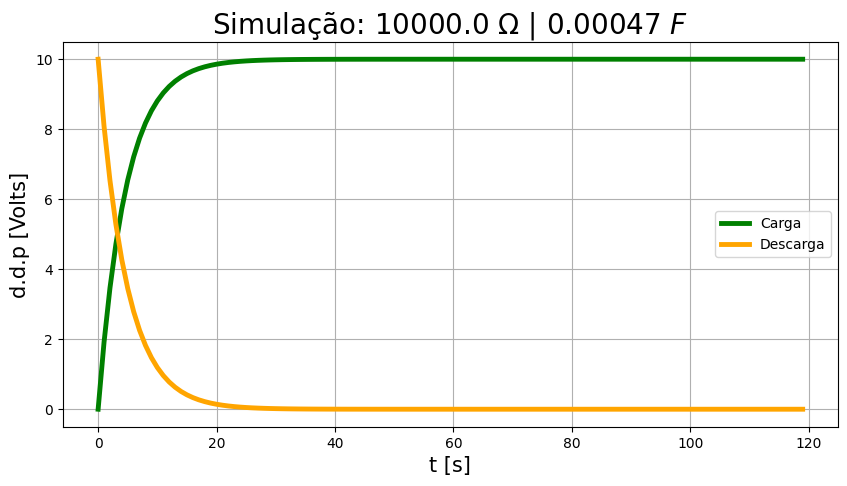

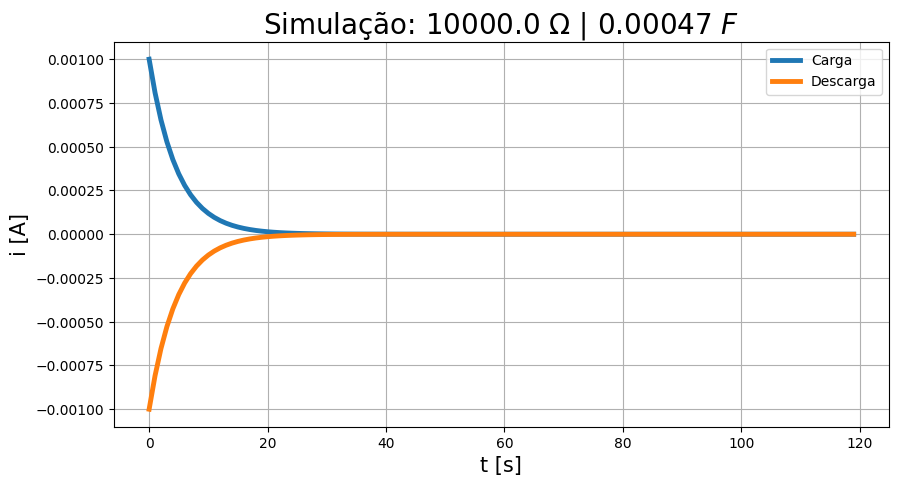

In [18]:
c_1 = 470e-6      # Farad
r_1 = 10e3        # Ohms
v_1 = 10            # Volts

# Passo do tempo para a simulacao
t = np.arange(0, 120)

# Chamando a funcao de carga no carregamento:
q_carga = q(c_1, r_1, v_1, t)         

# Chamando a funcao de corrente no carregamento:
i_carga = i(c_1, r_1, v_1, t)          

# Chamando a funcao de carga no descarregamento
q_descarga = q_2(c_1, r_1, v_1, t)       

# Chamando a funcao de corrente no descarregamento
i_descarga = i_2(c_1, r_1, v_1, t)       

# Grafico:Carga e descarga sob o ponto de vista da d.d.p.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, q_carga/c_1, color="green", label="Carga", linewidth=3.5) # Vc = q/C
plt.plot(t, q_descarga/c_1, color="orange", label="Descarga", linewidth=3.5)
plt.xlabel("t [s]", fontsize=15)
plt.ylabel("d.d.p [Volts]", fontsize=15)
plt.title("Simulação: {} $\Omega \ | \ {}\ F$".format(r_1, c_1), fontsize=20)
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig1.png') # Formatos: (.png) ; (.jpg) ; (.pdf), por exemplo.
plt.close()

# Grafico:Carga e descarga sob o ponto de vista da corrente.
fig = plt.figure(figsize=(10, 5))
plt.plot(t, i_carga, label= "Carga", linewidth=3.5)
plt.plot(t, i_descarga, label= "Descarga", linewidth=3.5)
plt.xlabel("t [s]", fontsize=15)
plt.ylabel("i [A]", fontsize=15)
plt.title("Simulação: {} $\Omega \ | \ {}\ F$".format(r_1, c_1), fontsize=20)
plt.grid()
plt.legend(loc=0)
plt.show()
fig.savefig('fig2.png')
plt.close()